# Import Libraries
---

In [3]:
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings("ignore")

# import data
---

In [7]:
data = pd.read_csv('Gold_Price_Data.csv')

In [8]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Exploratory Data Analysis
---

### Statistical Analysis

In [9]:
data.shape

(2290, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
data.duplicated().sum()

0

In [14]:
data.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

### Visualization Analysis

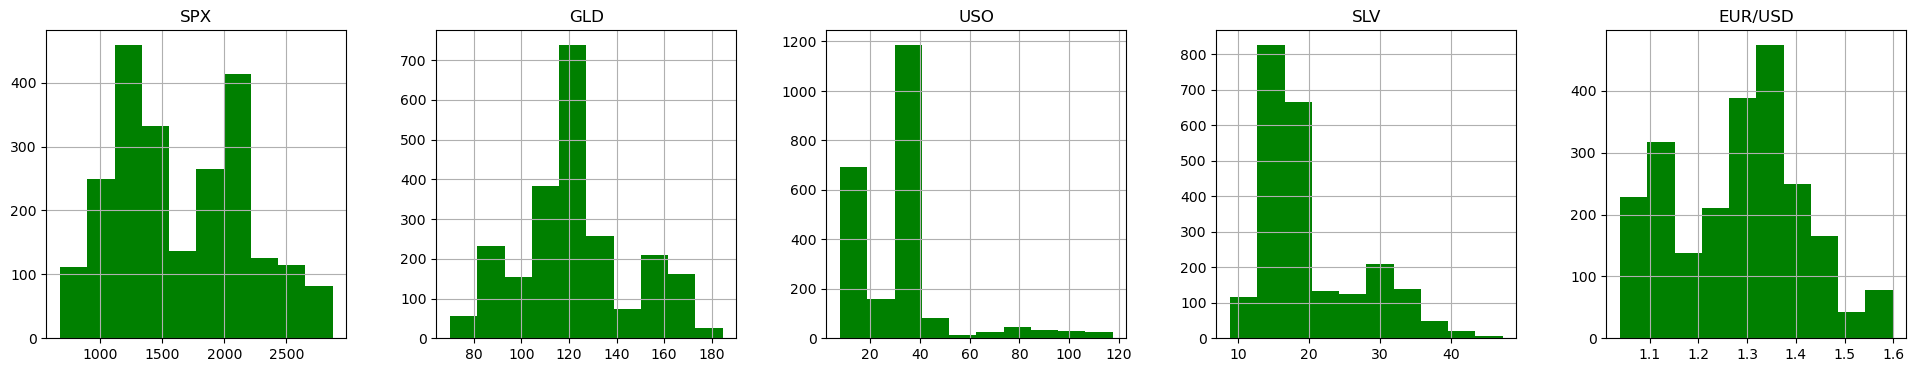

In [15]:
data.hist(figsize=(24,4), layout=(1,5), color="g");

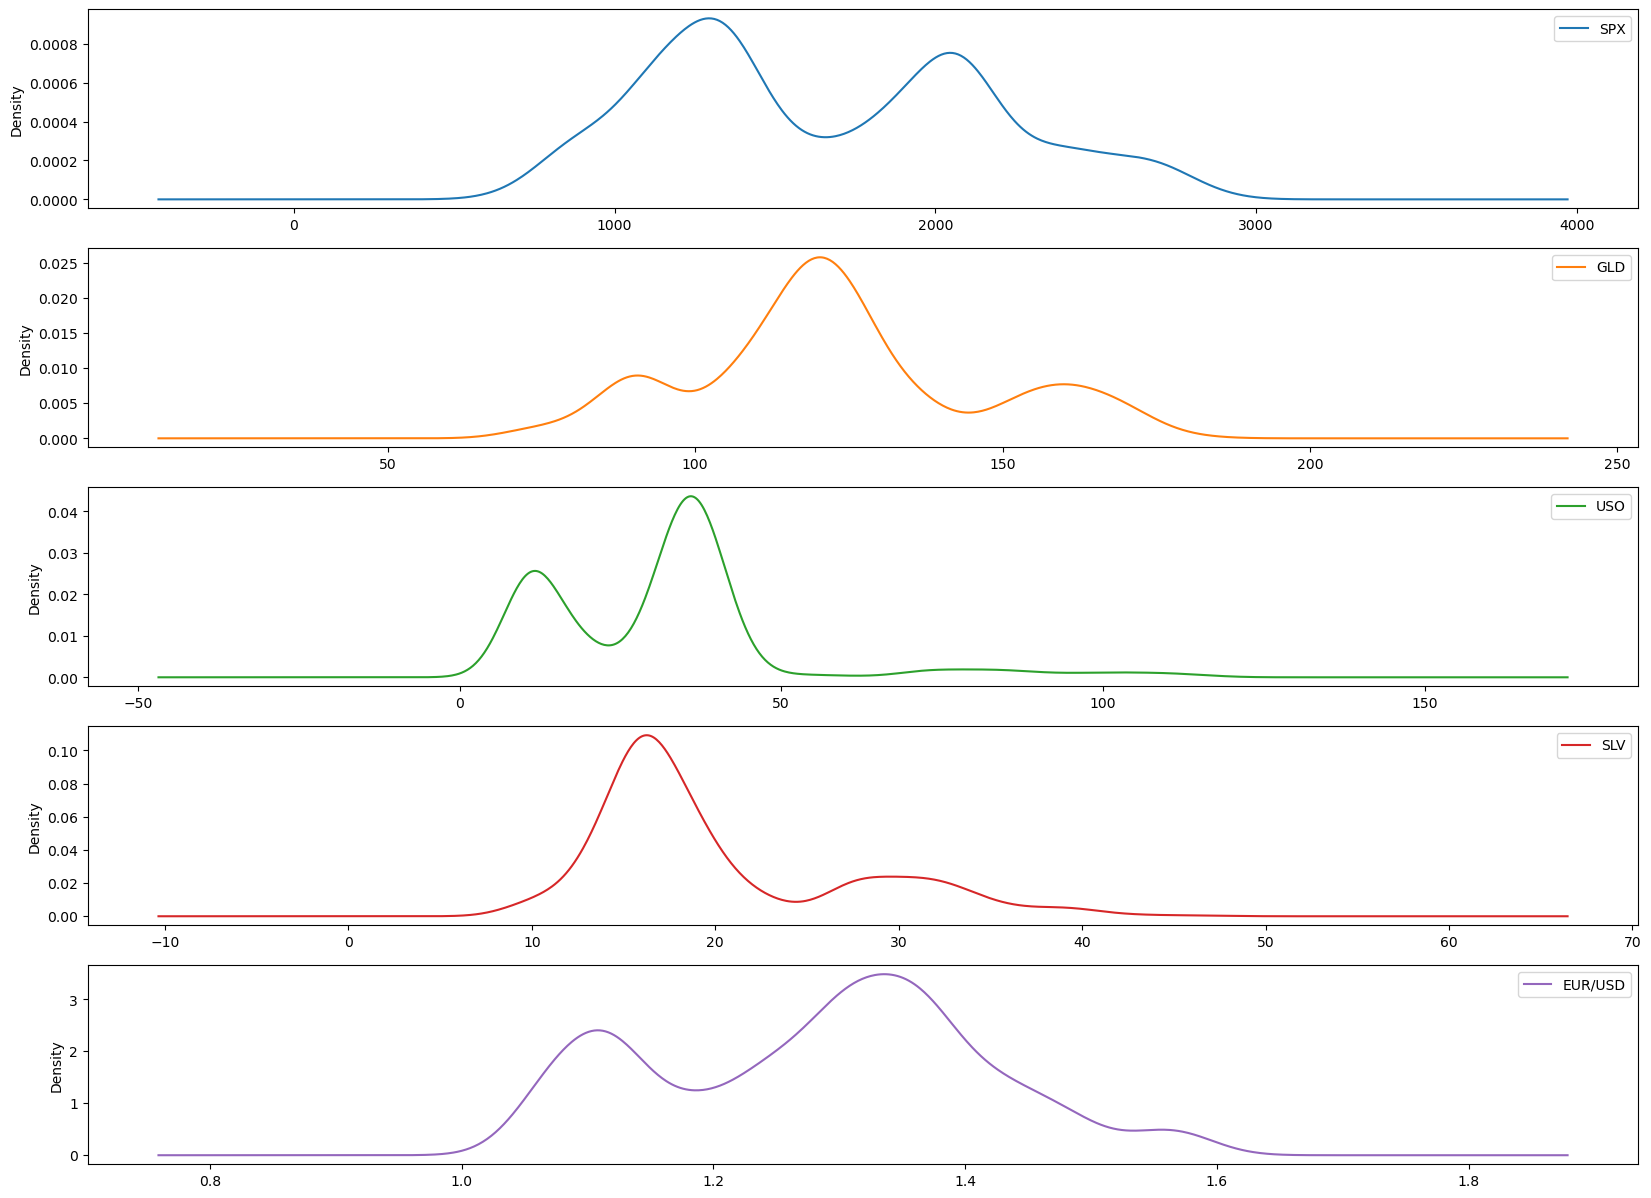

In [16]:
data.plot(kind="kde", subplots=True, layout=(5,1), figsize=(20,15),sharex=False, sharey=False);

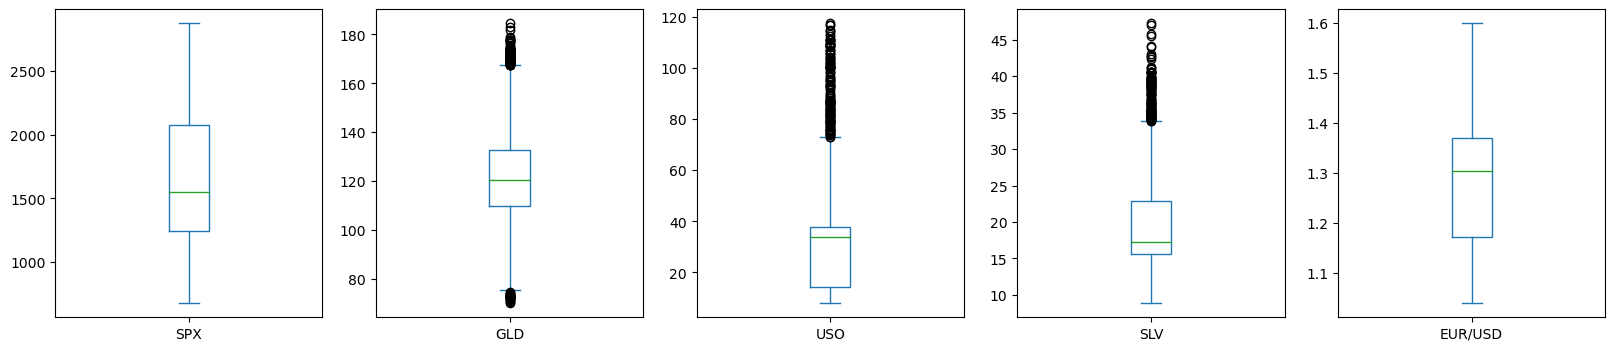

In [17]:
data.plot(kind="box", subplots=True, layout=(1,5), figsize=(20,4),sharex=False, sharey=False);

### Multivariate

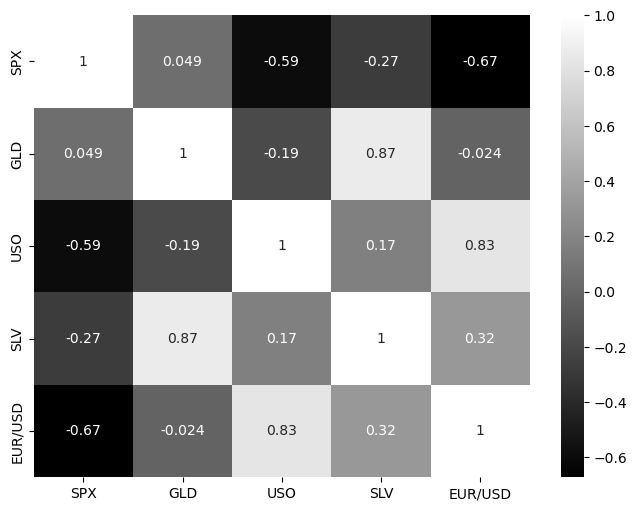

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="gist_gray");

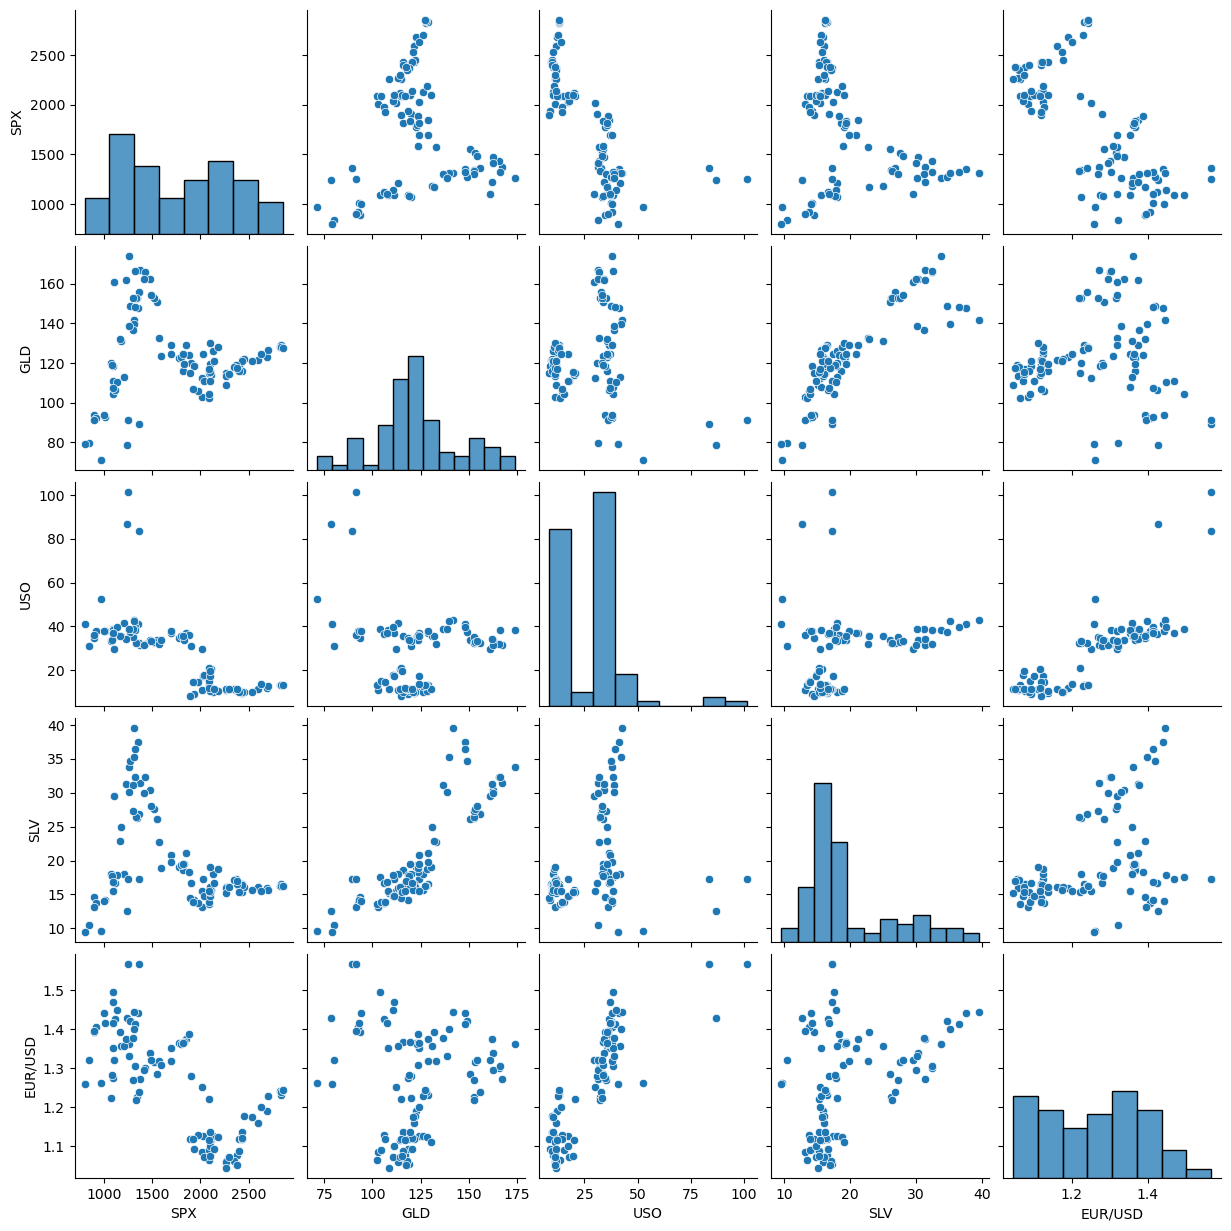

In [19]:
sns.pairplot(data.sample(n=100));

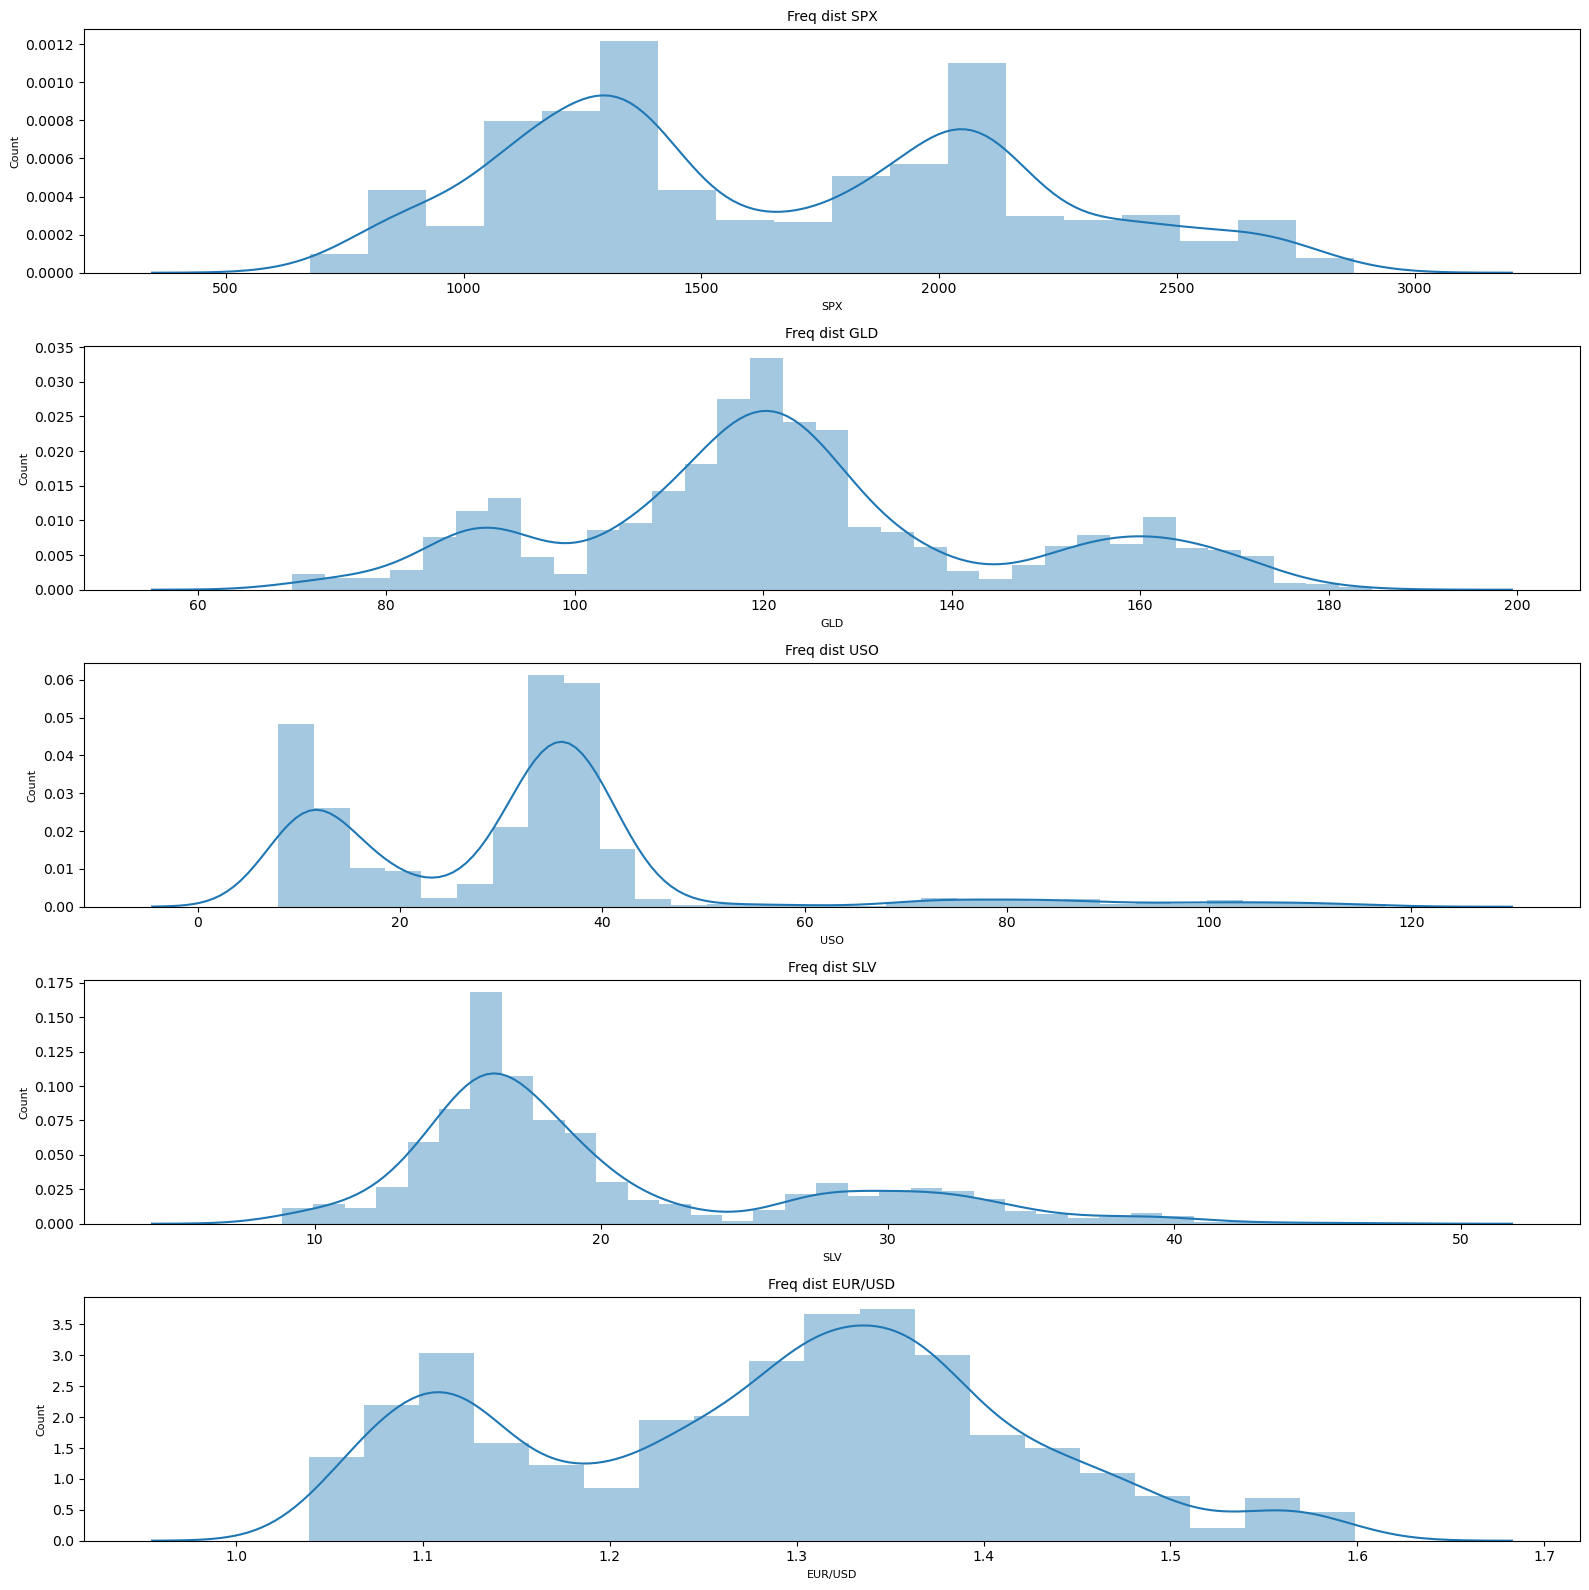

In [20]:
col_names = ['SPX','GLD', 'USO', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(16,16))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
    plt.tight_layout()

plt.show()

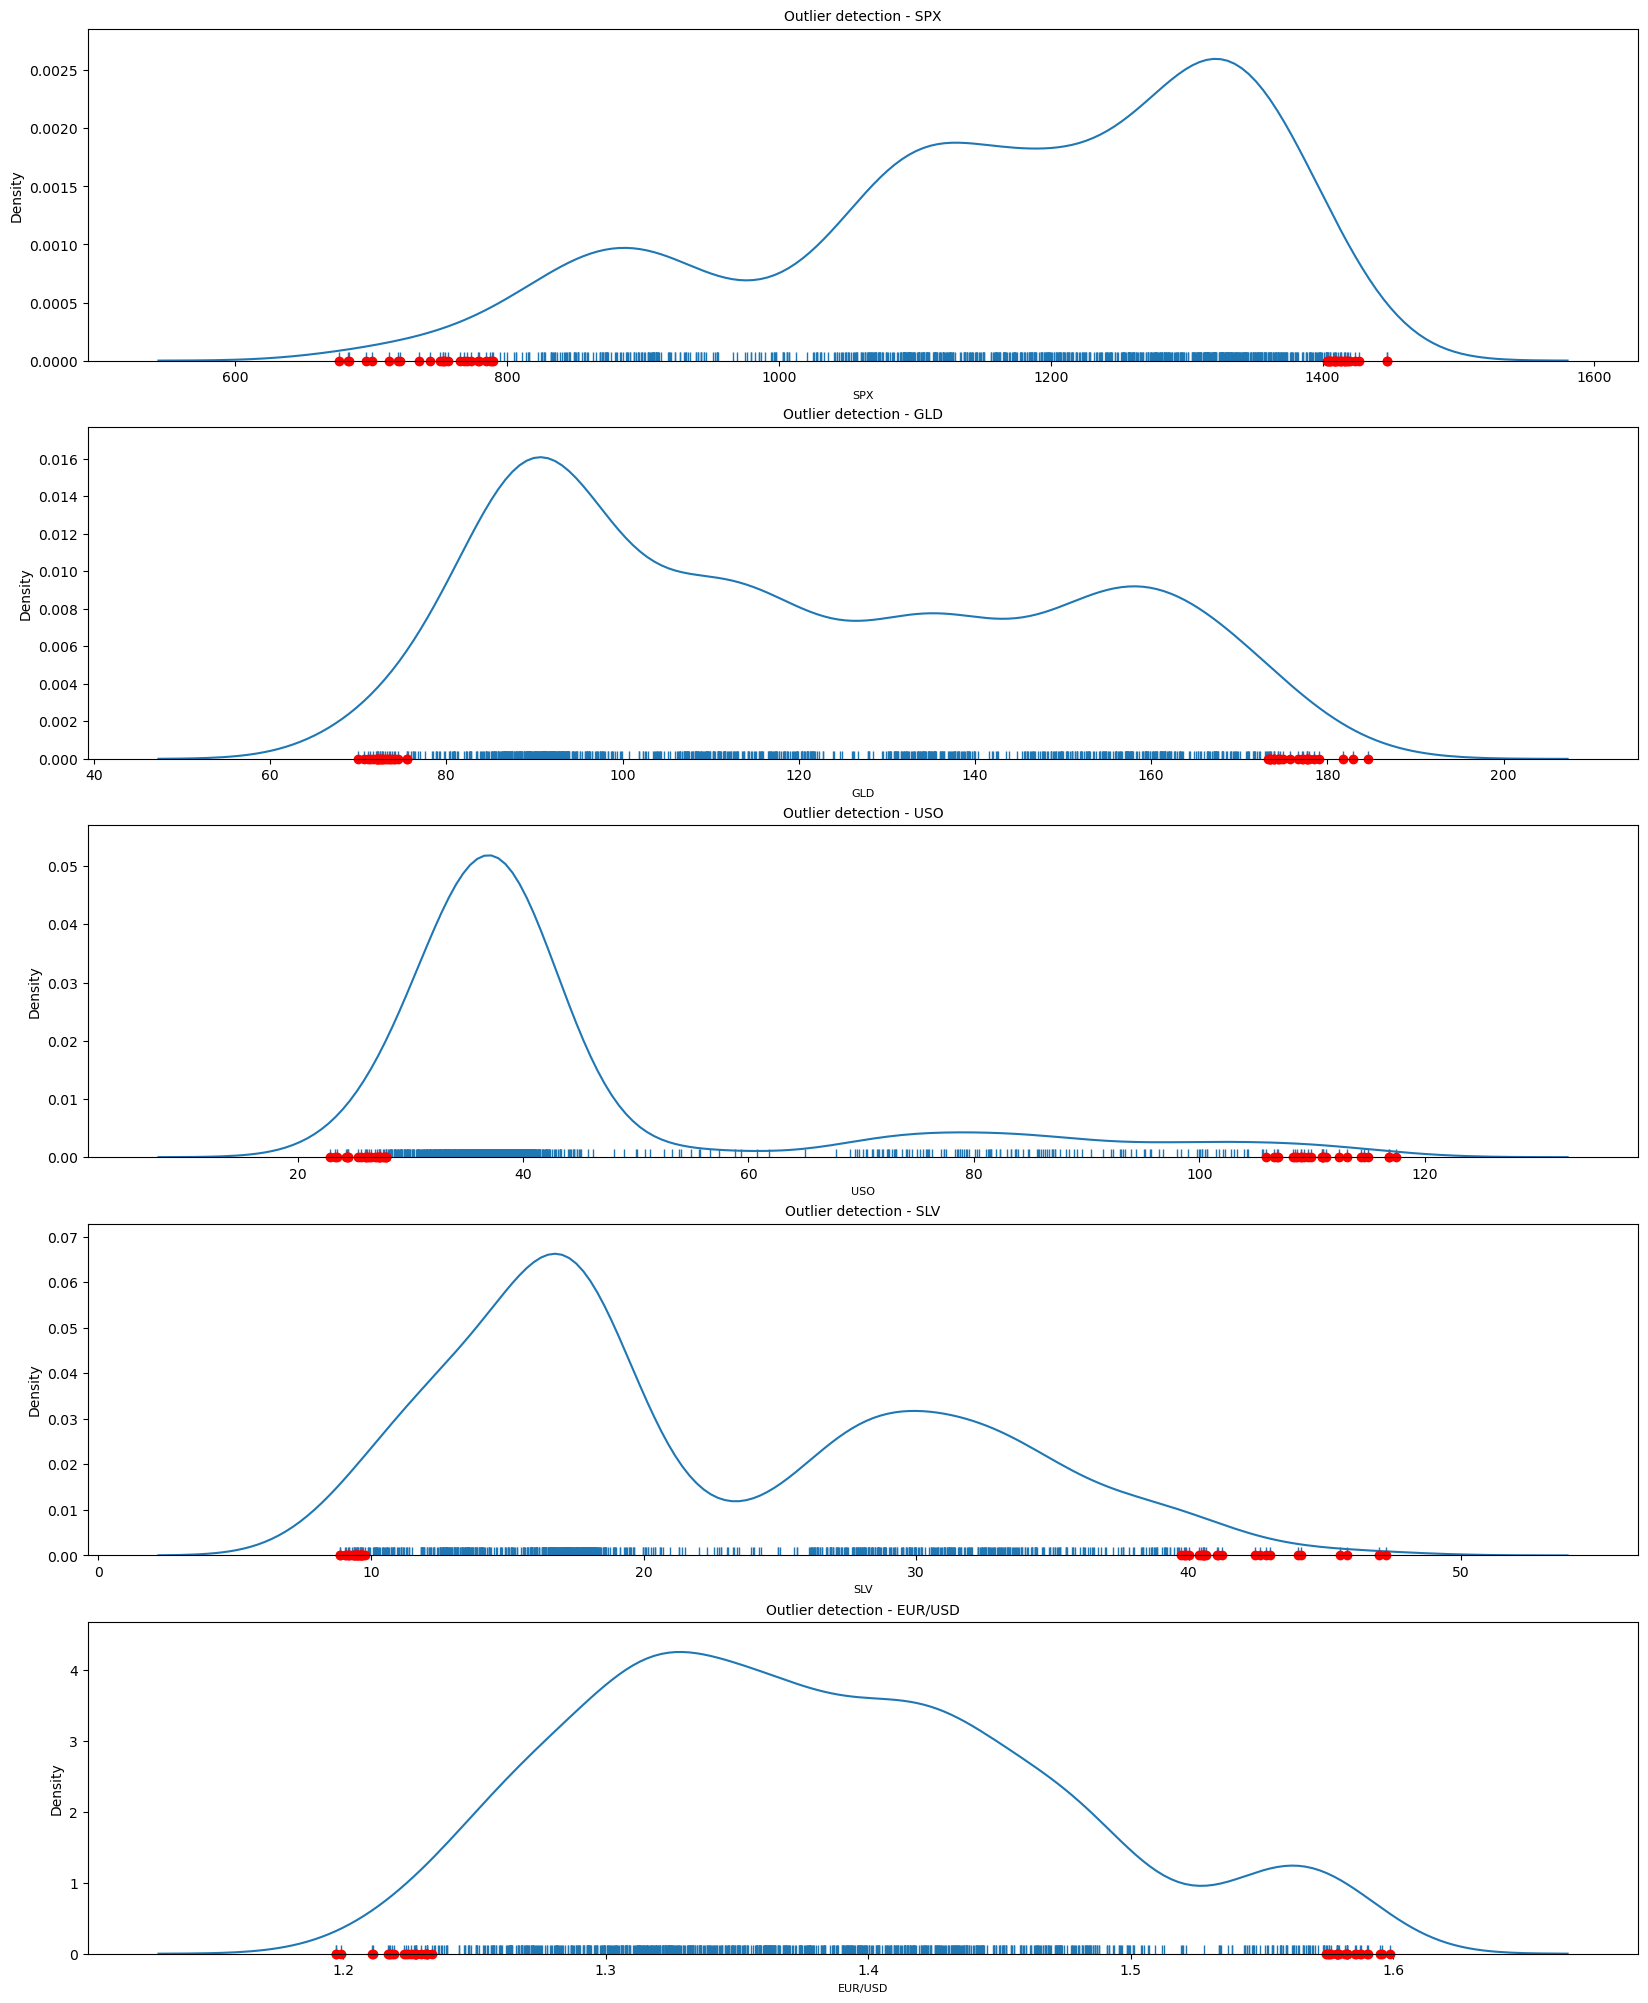

In [21]:
import numpy as np

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['SPX','GLD', 'USO', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(20,25))

for i, col_val in enumerate(col_names):
    x = data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Preprocessing
---

In [22]:
data_preprocessed = data.copy()

In [23]:
#To find the %ge of Null values by columns
data_preprocessed.isnull().mean() * 100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [24]:
data_preprocessed.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [25]:
data_preprocessed['Date'] = pd.to_datetime(data_preprocessed['Date'])

In [26]:
data_preprocessed.reset_index(drop=True, inplace=True)
data_preprocessed

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [27]:
data_preprocessed.drop(['Date'], axis=1, inplace=True)
data_preprocessed

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [29]:
## train test split
from sklearn.model_selection import train_test_split

X = data_preprocessed.drop(['GLD'],axis=1)
y = data_preprocessed['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Modeling
---

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
lr = LinearRegression().fit(X_train, y_train)
y_lr = lr.predict(X_test)

In [33]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [34]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_dt = dt.predict(X_test)

In [35]:
rf = RandomForestRegressor().fit(X_train,y_train)
y_rf = rf.predict(X_test)

#### Model Evaluation

In [36]:
from sklearn import metrics

lr_score = metrics.r2_score(y_test, y_lr)
knn_score = metrics.r2_score(y_test, y_knn)
dt_score = metrics.r2_score(y_test, y_dt)
rf_score = metrics.r2_score(y_test, y_rf)

In [37]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "Accuracy", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score)
print("-"*50)

******************** Accuracy ********************
--------------------------------------------------
| Linear Regression:  0.8975640982991401
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  0.9498941858300118
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  0.9845294218956613
--------------------------------------------------
--------------------------------------------------
| Random Forest:  0.9904775627736585
--------------------------------------------------


> **We get the highest accuracy in Random Forest**

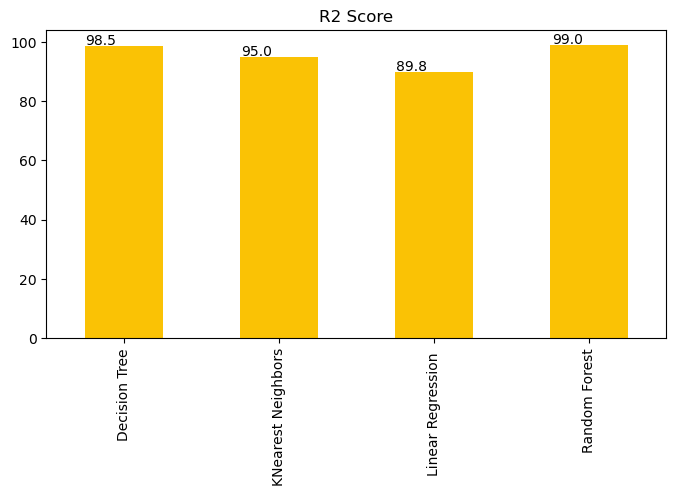

In [38]:
metric_val = {
    "R2 score": {
    "Linear Regression ": lr_score*100,
    "KNearest Neighbors": knn_score*100,
    "Decision Tree": dt_score*100,
    "Random Forest": rf_score*100
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (8,4), 
                             legend =False, 
                             title = "R2 Score",
                             color = '#FAC205');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

---